In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
%matplotlib inline

In [187]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [189]:
df.shape

(891, 15)

In [190]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [191]:
df.describe(include="object")

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [192]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [193]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [194]:
df.isnull().sum().sum()

869

In [195]:
df.drop('deck',axis = 1 , inplace= True)

# # df["deck"] = df["deck"].cat.add_categories("unknown")
# df["deck"].fillna("unknown",inplace=True)
# # you can also fill the missing value with an unknown variable

In [196]:
df.shape

(891, 14)

In [197]:
df['age'].fillna(df['age'].mean(), inplace =True)

In [198]:
def fill_missing_values_mean(data, column):
    """
     This function fills the missing values with mean and returns the filled dataframe

    Input:
    - df: DataFrame
    - column: Column with missing values

    Return:
    - Column with filled missing values
    """
    df[column].fillna(df[column].mean(),inplace=True)
    return df[column] 

print(fill_missing_values_mean.__doc__)


     This function fills the missing values with mean and returns the filled dataframe

    Input:
    - df: DataFrame
    - column: Column with missing values

    Return:
    - Column with filled missing values
    


In [199]:
columns_with_empty_values = ['age']
for i in columns_with_empty_values:
    fill_missing_values_mean(df,i)

In [200]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [201]:
categorical_features_missing_values = [ 'embark_town','embarked']
for column in categorical_features_missing_values:
    df[column].fillna(df[column].mode()[0], inplace=True)
df.isnull().sum().sum()

0

In [202]:
df['embark_town'].nunique()

3

<Axes: >

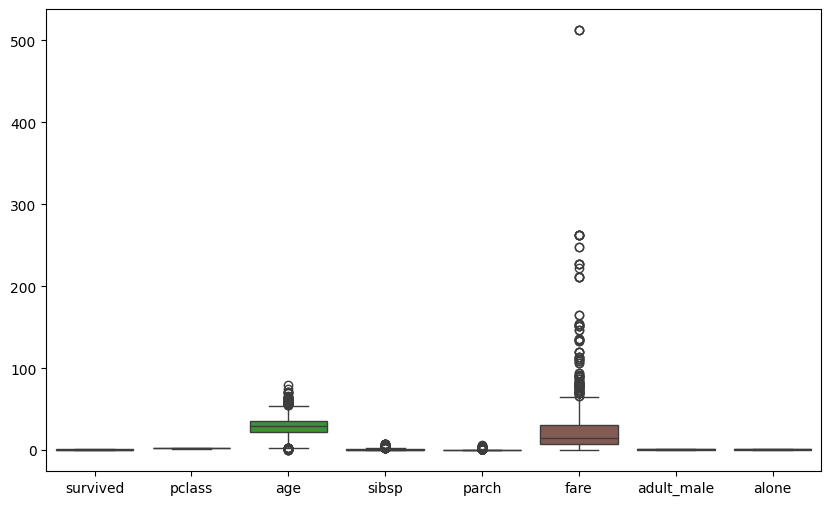

In [203]:
plt.figure(figsize =(10,6))
sns.boxplot(df)

In [204]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object

In [205]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [206]:
df['age'] = df['age'].astype('int64')

<Axes: xlabel='age', ylabel='Count'>

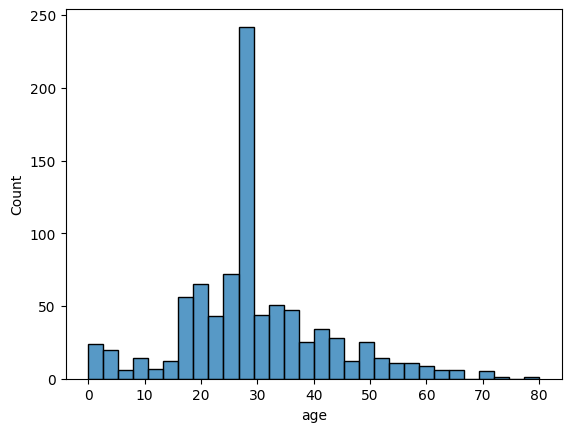

In [207]:
sns.histplot(data = df ,palette="dark" , x = 'age')

In [208]:
selected_features = ['age', 'fare']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected features
df[selected_features] = scaler.fit_transform(df[selected_features])

In [209]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.2750,1,0,0.014151,S,Third,man,True,Southampton,no,False
1,1,1,female,0.4750,1,0,0.139136,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0.3250,0,0,0.015469,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.4375,1,0,0.103644,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.4375,0,0,0.015713,S,Third,man,True,Southampton,no,True


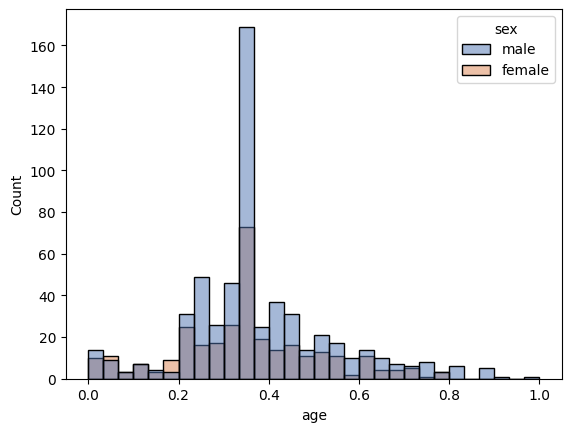

In [210]:
sns.histplot(data = df ,palette="deep" , x = 'age' , hue = 'sex')
plt.show()

In [211]:
import warnings
warnings.filterwarnings("ignore")

In [212]:
df['sex'] = df['sex'].map({'male':1,'female':0})

In [213]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,0.2750,1,0,0.014151,S,Third,man,True,Southampton,no,False
1,1,1,0,0.4750,1,0,0.139136,C,First,woman,False,Cherbourg,yes,False
2,1,3,0,0.3250,0,0,0.015469,S,Third,woman,False,Southampton,yes,True
3,1,1,0,0.4375,1,0,0.103644,S,First,woman,False,Southampton,yes,False
4,0,3,1,0.4375,0,0,0.015713,S,Third,man,True,Southampton,no,True


In [214]:
one_hot_encoded = pd.get_dummies(df['embark_town'], prefix='embark_town' , dtype=int)

# Concatenate one-hot encoded DataFrame with original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)


In [215]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0.2750,1,0,0.014151,S,Third,man,True,Southampton,no,False,0,0,1
1,1,1,0,0.4750,1,0,0.139136,C,First,woman,False,Cherbourg,yes,False,1,0,0
2,1,3,0,0.3250,0,0,0.015469,S,Third,woman,False,Southampton,yes,True,0,0,1
3,1,1,0,0.4375,1,0,0.103644,S,First,woman,False,Southampton,yes,False,0,0,1
4,0,3,1,0.4375,0,0,0.015713,S,Third,man,True,Southampton,no,True,0,0,1


In [216]:
df.dtypes

survived                      int64
pclass                        int64
sex                           int64
age                         float64
sibsp                         int64
parch                         int64
fare                        float64
embarked                     object
class                      category
who                          object
adult_male                     bool
embark_town                  object
alive                        object
alone                          bool
embark_town_Cherbourg         int32
embark_town_Queenstown        int32
embark_town_Southampton       int32
dtype: object